#Exercise 1

In [ ]:
import numpy as np
from keras.datasets import mnist
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical, plot_model

import keras.layers as l
import keras.models as m
import keras.optimizers as o
import tensorflow as tf
from keras import backend as k

import matplotlib.pyplot as plt

In [ ]:
# load dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#Normalization in the dataset
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

#Convert labels to categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)



##Problem B

In [ ]:
#Create a Debse layer network
def dense_nn(hidden_layers, act_function, units):
    #Create Input layer
    Input = l.Input(shape=(28, 28, 1)) #the pixels of each image
    hidden = l.Flatten()(Input) #Flatten the image

    #Create Hidden layers
    for i in range(hidden_layers):
      hidden = l.Dense(units, activation=act_function)(hidden)

    #Create Output layer
    output = l.Dense(10, activation='softmax')(hidden)

    #Create Classifier model
    classifier = m.Model(Input, output)
    return classifier

In [ ]:
#Number of hidder layers
num_hidden  = [5, 20, 40]
#Activation functions
act_func = ["relu", "tanh", "sigmoid"]
#Number of unites
units = 32

val_loss_list=[]
val_accuracy_list=[]

#Repeat for every number of hidden layers
for num in num_hidden:
    #Repeat for every activation function
    for act in act_func:
        #Create model
        classifier = dense_nn(num, act, units)
        #Print network summary
        #classifier.summary()
        #Compile model
        classifier.compile(
            loss='categorical_crossentropy',
            optimizer=tf.optimizers.SGD(learning_rate=0.01),
            metrics=["accuracy"]
            )
        #Train model
        classifier.fit(
            x_train,
            y_train,
            batch_size=64,
            epochs=40,
            validation_data=(x_test, y_test),
            verbose=0 #Silence output of training
            )
        print("Accuracy and loss of model with {} hidden layers and {} activation function:".format(num, act))
        val_loss, val_accuracy = classifier.evaluate(x_test, y_test, verbose=0)
        val_loss_list.append(val_loss)
        val_accuracy_list.append(val_accuracy)
        train_loss, train_accuracy = classifier.evaluate(x_train, y_train, verbose=0)
        print("Train loss:", round(train_loss, 4))
        print("Train accuracy:", round(train_accuracy, 4))
        print("Validation loss:", round(val_loss, 4))
        print("Validation accuracy:", round(val_accuracy, 4))
        print()


Accuracy and loss of model with 5 hidden layers and relu activation function:
Train loss: 0.0537
Train accuracy: 0.9836
Validation loss: 0.1304
Validation accuracy: 0.9631

Accuracy and loss of model with 5 hidden layers and tanh activation function:
Train loss: 0.0505
Train accuracy: 0.9864
Validation loss: 0.1103
Validation accuracy: 0.9679

Accuracy and loss of model with 5 hidden layers and sigmoid activation function:
Train loss: 2.301
Train accuracy: 0.1124
Validation loss: 2.3008
Validation accuracy: 0.1135

Accuracy and loss of model with 20 hidden layers and relu activation function:
Train loss: 0.0817
Train accuracy: 0.9786
Validation loss: 0.1913
Validation accuracy: 0.9555

Accuracy and loss of model with 20 hidden layers and tanh activation function:
Train loss: 0.0446
Train accuracy: 0.9888
Validation loss: 0.1542
Validation accuracy: 0.9644

Accuracy and loss of model with 20 hidden layers and sigmoid activation function:
Train loss: 2.3017
Train accuracy: 0.1124
Validat

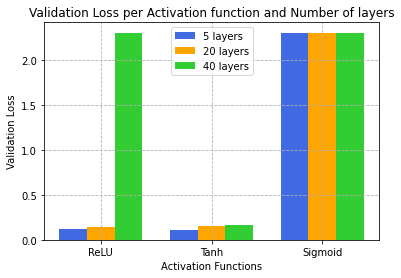

In [ ]:
#Create bar plot for the validation loss per activation function and per number of layers
x_axis=np.arange(len(act_func))
#Width of the bars
width = 0.25
#Apply grid line
plt.grid(linestyle='--')

#For 5 layers
vals5 = val_loss_list[0:3]
bar1 = plt.bar(x_axis, vals5, width, color='royalblue')

#For 20 layers
vals20 = val_loss_list[3:6]
bar2 = plt.bar(x_axis+width, vals20, width, color='orange')

#For 40 layers
vals40 = val_loss_list[6:]
bar3 = plt.bar(x_axis+width*2, vals40, width, color='limegreen')

plt.xlabel("Activation Functions")
plt.ylabel("Validation Loss")
plt.title("Validation Loss per Activation function and Number of layers")


plt.xticks(x_axis+width, ["ReLU",'Tanh','Sigmoid'])
plt.legend( (bar1, bar2, bar3), ('5 layers', '20 layers', '40 layers') )

plt.show()

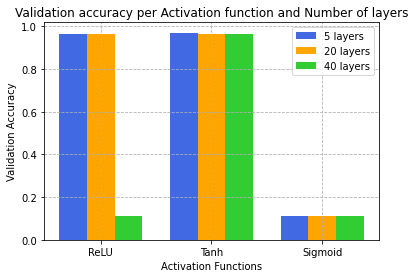

In [ ]:
#Create bar plot for the validation accuracy per activation function and per number of layers
x_axis=np.arange(len(act_func))
#Width of the bars
width = 0.25
#Apply grid line
plt.grid(linestyle='--')

#For 5 layers
vals5 = val_accuracy_list[0:3]
bar1 = plt.bar(x_axis, vals5, width, color='royalblue')

#For 20 layers
vals20 = val_accuracy_list[3:6]
bar2 = plt.bar(x_axis+width, vals20, width, color='orange')

#For 40 layers
vals40 = val_accuracy_list[6:]
bar3 = plt.bar(x_axis+width*2, vals40, width, color='limegreen')

plt.xlabel("Activation Functions")
plt.ylabel("Validation Accuracy")
plt.title("Validation accuracy per Activation function and Number of layers")


plt.xticks(x_axis+width, ["ReLU",'Tanh','Sigmoid'])
plt.legend( (bar1, bar2, bar3), ('5 layers', '20 layers', '40 layers') )

plt.show()

## Probelm C

Running for 5 hidden layers and relu activation function...
Running for 5 hidden layers and tanh activation function...
Running for 5 hidden layers and sigmoid activation function...
Running for 20 hidden layers and relu activation function...
Running for 20 hidden layers and tanh activation function...
Running for 20 hidden layers and sigmoid activation function...
Running for 40 hidden layers and relu activation function...
Running for 40 hidden layers and tanh activation function...
Running for 40 hidden layers and sigmoid activation function...


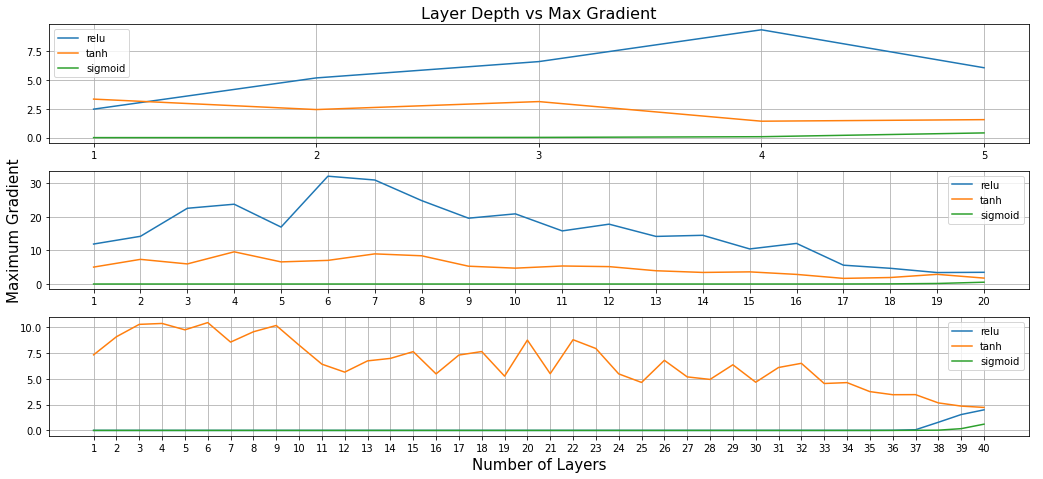

In [ ]:
#Number of hidder layers
num_hidden  = [5, 20, 40]
#Activation functions
act_func = ["relu", "tanh", "sigmoid"]
#Number of unites
units = 32

x_mini_batch = x_train[:64]
y_mini_batch = y_train[:64]

fig, axs = plt.subplots(3, 1, figsize=(15,7))

for i, num in enumerate(num_hidden):
    for act in act_func:
        print("Running for {} hidden layers and {} activation function...".format(num, act))
        #Create model
        classifier = dense_nn(num, act, units)
        #Print network summary
        #classifier.summary()
        #Compile model
        optimizer=tf.keras.optimizers.SGD(learning_rate=0.01)
        loss=tf.keras.losses.categorical_crossentropy
        
        classifier.compile(
            loss=loss,
            optimizer=optimizer,
            metrics=["accuracy"]
            )
        #Train model
        classifier.fit(
            x_train,
            y_train,
            batch_size=64,
            epochs=3,
            validation_data=(x_test, y_test),
            verbose=0 #Silence output of training
            )
        
        # Open a GradientTape to record the operations run
        # during the forward pass, which enables auto-differentiation. https://keras.io/guides/writing_a_training_loop_from_scratch/
        with tf.GradientTape() as tape:
            
            # Run the forward pass of the layer.
            # The operations that the layer applies
            # to its inputs are going to be recorded
            # on the GradientTape. 
            logits = classifier(x_mini_batch) # Logits for this minibatch
            
            # Compute the loss value for this minibatch.
            loss_value = loss(y_mini_batch, logits)

        # Use the gradient tape to automatically retrieve
        # the gradients of the trainable variables with respect to the loss
        gradients = tape.gradient(loss_value, classifier.trainable_weights)

        max_gradient = []
        for j in range(0, len(gradients), 2):
            max_gradient.append(np.max([np.max(gradients[j]), np.max(gradients[j+1])]))

        
        labels = list(np.arange(1,num+2))
        labels[-1]="output"
        labels_str = [str(x) for x in labels]
        axs[i].plot(labels_str[:-1], max_gradient[:-1], label=act)

    axs[i].legend()
    axs[i].grid()

fig.add_subplot(111, frame_on=False)
plt.tick_params(labelcolor="none", bottom=False, left=False)

plt.xlabel("Number of Layers", fontsize=15)
plt.ylabel('Maximum Gradient', fontsize=15)
plt.title('Layer Depth vs Max Gradient', fontsize=16)

fig.tight_layout()
plt.show()

##Problem D

In [ ]:
#Create the LeCun fucntion
from keras.utils.generic_utils import get_custom_objects
from keras.layers import Activation
def LeCun(x):
    return k.tanh((2/3)*x)*1.7159 + (0.01*x)

get_custom_objects().update({'lecun': Activation(LeCun)})

Running for 5 hidden layers and tanh activation function...
Running for 5 hidden layers and lecun activation function...
Running for 20 hidden layers and tanh activation function...
Running for 20 hidden layers and lecun activation function...
Running for 40 hidden layers and tanh activation function...
Running for 40 hidden layers and lecun activation function...


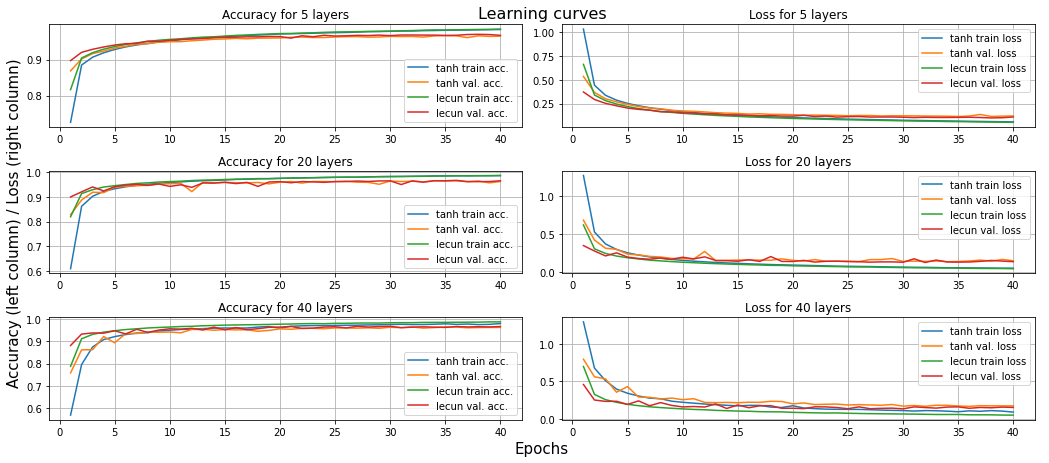

In [ ]:
#Number of hidder layers
num_hidden  = [5, 20, 40]
#Activation functions
act_func = ["tanh", 'lecun']
#Number of unites
units = 32

x_axis = list(np.arange(1,epochs+1))
fig, axs = plt.subplots(3,2,  figsize=(15,7))

for i, num in enumerate(num_hidden):
    for act in act_func:
        print("Running for {} hidden layers and {} activation function...".format(num, act))
        #Create model
        classifier = dense_nn(num, act, units)
        #Print network summary
        #classifier.summary()
        #Compile model
        optimizer=tf.keras.optimizers.SGD(learning_rate=0.01)
        loss=tf.keras.losses.categorical_crossentropy
        classifier.compile(
            loss=loss,
            optimizer=optimizer,
            metrics=["accuracy"]
            )
        #Train model
        history = classifier.fit(
            x_train,
            y_train,
            batch_size=64,
            epochs=40,
            validation_data=(x_test, y_test),
            verbose=0 #Silence output of training
            )

        #Plot learning curves
        axs[i][0].plot(x_axis, history.history['accuracy'], label="{} train acc.".format(str(act)))
        axs[i][1].plot(x_axis, history.history['loss'], label="{} train loss".format(str(act)))
        axs[i][0].plot(x_axis, history.history['val_accuracy'], label="{} val. acc.".format(str(act)))
        axs[i][1].plot(x_axis, history.history['val_loss'], label="{} val. loss".format(str(act)))



    axs[i][0].title.set_text("Accuracy for {} layers".format(num))
    axs[i][1].title.set_text("Loss for {} layers".format(num))

    axs[i][0].legend()
    axs[i][1].legend()

    axs[i][0].grid()
    axs[i][1].grid()

fig.add_subplot(111, frame_on=False)
plt.tick_params(labelcolor="none", bottom=False, left=False)

plt.xlabel("Epochs", fontsize=15)
plt.ylabel('Accuracy (left column) / Loss (right column)', fontsize=15)
plt.title('Learning curves', fontsize=16)

fig.tight_layout()
plt.show()

Running for 5 hidden layers and tanh activation function...
Running for 5 hidden layers and lecun activation function...
Running for 20 hidden layers and tanh activation function...
Running for 20 hidden layers and lecun activation function...
Running for 40 hidden layers and tanh activation function...
Running for 40 hidden layers and lecun activation function...


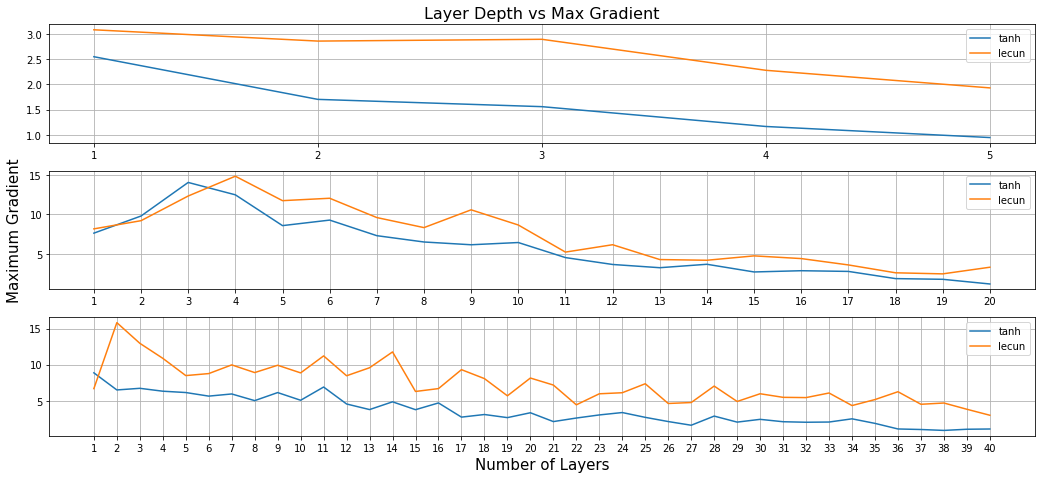

In [ ]:
#Number of hidder layers
num_hidden  = [5, 20, 40]
#Activation functions
act_func = ["tanh", 'lecun']
#Number of unites
units = 32

x_mini_batch = x_train[:64]
y_mini_batch = y_train[:64]

fig, axs = plt.subplots(3, 1,  figsize=(15,7))

for i, num in enumerate(num_hidden):
    for act in act_func:
        print("Running for {} hidden layers and {} activation function...".format(num, act))
        
        #Create model
        classifier = dense_nn(num, act, units)
        
        #Print network summary
        #classifier.summary()

        #Compile model
        optimizer=tf.keras.optimizers.SGD(learning_rate=0.01)
        loss=tf.keras.losses.categorical_crossentropy
        
        classifier.compile(
            loss=loss,
            optimizer=optimizer,
            metrics=["accuracy"]
            )
        #Train model
        classifier.fit(
            x_train,
            y_train,
            batch_size=64,
            epochs=3,
            validation_data=(x_test, y_test),
            verbose=0 #Silence output of training
            )
        
        # Open a GradientTape to record the operations run
        # during the forward pass, which enables auto-differentiation. https://keras.io/guides/writing_a_training_loop_from_scratch/
        with tf.GradientTape() as tape:
            
            # Run the forward pass of the layer.
            # The operations that the layer applies
            # to its inputs are going to be recorded
            # on the GradientTape. 
            logits = classifier(x_mini_batch) # Logits for this minibatch
            
            # Compute the loss value for this minibatch.
            loss_value = loss(y_mini_batch, logits)

        # Use the gradient tape to automatically retrieve
        # the gradients of the trainable variables with respect to the loss
        gradients = tape.gradient(loss_value, classifier.trainable_weights)

        max_gradient = []
        for j in range(0, len(gradients), 2):
            max_gradient.append(np.max([np.max(gradients[j]), np.max(gradients[j+1])]))

        labels = list(np.arange(1,num+2))
        labels[-1]="output"
        labels_str = [str(x) for x in labels]
        axs[i].plot(labels_str[:-1], max_gradient[:-1], label=act)

    axs[i].legend()
    axs[i].grid()

fig.add_subplot(111, frame_on=False)
plt.tick_params(labelcolor="none", bottom=False, left=False)

plt.xlabel("Number of Layers", fontsize=15)
plt.ylabel('Maximum Gradient', fontsize=15)
plt.title('Layer Depth vs Max Gradient', fontsize=16)

fig.tight_layout()
plt.show()